In [3]:
import pandas as pd
import numpy as np

from binarytree import Node
from collections import deque
from typing import List, Set

# necessary to allow RAGs to be inserted in nodes
#binarytree._NODE_VAL_TYPES = (float, int, str, list)

In [434]:
cognate = pd.read_csv("Grollemund_Data_Cognate.csv", index_col=0)
phonetic = pd.read_csv("Grollemund_Data_Phoneme.csv", index_col=0)
features = pd.read_csv("Chomsky_Halle_Features.csv", index_col=0)

indel = "indel"

phonetic

,animal,arm,ashes,bark,bed,belly,big,bird,bite,blood,...,urine,village,vomit,walk,war,water,wind,woman,dew,iron
Fefe_Grassfields,nə̀ə,pō,vhʉ̄,kɔ̀p,kwɛ̄n,vàm,?,sāk,lōm,n-sì˚,...,nsìnsìi,lāʔ,?,nàk,ǹcò,nʃì˚,fùfùa,mʉ̀-nʒwīɛ,mùʔ˚,tɛ̄nʌ̄
Mungaka_Grassfields,ɲàm,bó,búˈmúˀ,ŋ-gùptʉ́,kún,bòm,?,mʉ́ˈ-sə́ŋ,núm,ǹ-cíbàŋ,...,cèn,ŋgɔ́ŋ,?,jǐt,bɛ̀t,ncì,fʉ̀fʉ̀ɛt,mʌ̀ŋgwí,mīnī,tʉ́n
Bamun_Grassfields,ɲàm,pú,vʉ́,ŋ-gùp tɨ́tɨ́,kún,vàm,?,mʌ́-síi,nɨ́mə́,n-ʃì,...,nʃɛ̀ɛ́ ŋkiɛ̄,ŋgùù,?,?,pìt,ŋkìɛ˚,fɨ̀fɨ̀ɛ̀t,mʌ̃̀ngbiə̌,mɨɨ̀ʔ,mbún
Kom_Grassfields,ə̄-ɲám,ə̄-kwœ́,ā-bvʊ́ˋ,ɛ̀-gvu-ə̀wún,ə̄-kɔínˊ,ə̄-lvʊâ,?,ə̄fə̄-ɲýīn,lōm,ə̄mə̄-lúŋˊ,...,ə̄mə̄ndʒî,ə̄ntə̀ʔ,?,?,éɣɔ̋ˈŋ́,ə̄mú,āfʉɛ́fˋ,ə̄wí,āmʉâʔ,ākás
Oku_Grassfields,ɲàm,ē-bkɔ̂i,kə̄ɓə̂l,?,ē-bkón,ē-blɛ̂ː,?,fə̄-nʊ́n,lo᷆m,m̄-dóŋ,...,ə̄mə̄ndʒʉ̂ːnə̀,ntɛ̀k,?,?,?,m̄mɔ́ː,ēbfiɛ̂f,ɛ̀wīì,īŋwâk,kēkâs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S44_Ndebele,in-yama,iŋ-galo,lotʰa,-kʰonkotʰa,um-beda,isi-su,-kʰulu,in-yoni,-luma,i-gazi,...,um-kǀʰamo,umu-zi,ama-ɬanzo,-hamba,im-pi,ama-nzi,u-moya,i-nina,ama-zolo,in-simbi
S51_Tshwa,ɲama,wókó,kʰuma,hatí,?,rúmbú,hombé,ci-ɲaɲani,-luma,kʰata,...,?,?,?,-fámbá,?,mátí,?,wásátí,?,?
S53_Tsonga,ɲama,vókó,n-kuma,ri-hantí,mu-bédo,kʰw-írí,-kúlú,ɲaɲana,-lúma,n-gátí,...,mùr̥ùndzù,mut’i,-ɬánt’a,-fámbá,ɲimp’í,mátí,móyá,wánsátí,mbér̥á,nʱùmbù
S54_Ronga,ʃi-hare,boko,nora,bante,mu-bede,kʰu-re,hulo,ɲaɲana,luma,n-gate,...,mirundyo,mute,ɬanta,famba,yimpe,mate,meho,wansate,mbere,nsimbe


In [435]:
all_phonemes = list(features.columns)[0:]

feature_matrix = pd.DataFrame(0, index=phonemes, columns=phonemes)

for phoneme1 in all_phonemes:
    for phoneme2 in all_phonemes:
        for (f, g) in zip(features.loc[:,phoneme1], features.loc[:,phoneme2]):
            if(not pd.isnull(f) and not pd.isnull(g) and f != g):
                feature_matrix.loc[phoneme1, phoneme2] += 1
feature_matrix

,m,p,mp,pʰ,mpʰ,b,mb,ɓ,mɓ,ɸ,...,ɛ,ø,œ,o,ɔ,ə,ʌ,æ,a,ɑ
m,0,2,1,2,1,2,1,2,1,2,...,1,1,1,1,1,1,1,1,1,1
p,2,0,1,1,2,1,2,2,3,1,...,1,1,1,1,1,1,1,1,1,1
mp,1,1,0,2,1,2,1,3,2,1,...,1,1,1,1,1,1,1,1,1,1
pʰ,2,1,2,0,1,2,3,3,4,1,...,1,1,1,1,1,1,1,1,1,1
mpʰ,1,2,1,1,0,3,2,4,3,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ə,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
ʌ,1,1,1,1,1,1,1,1,1,1,...,1,3,2,2,1,0,0,2,1,2
æ,1,1,1,1,1,1,1,1,1,1,...,1,2,1,3,2,0,2,0,1,2
a,1,1,1,1,1,1,1,1,1,1,...,2,3,2,2,1,0,1,1,0,1


In [437]:
from collections import defaultdict
from typing import List, Optional
from scipy.spatial.distance import pdist, squareform

class StringEdit:
    '''Distance between strings


    Parameters
    ----------
    insertion_cost
    deletion_cost
    substitution_cost
    '''
    
    def __init__(self, insertion_cost: float = 1.,
                 deletion_cost: float = 1., cost_matrix: Optional[pd.DataFrame] = None):
        self._insertion_cost = insertion_cost
        self._deletion_cost = deletion_cost

    def __call__(self, source: str, target: str) -> float:
        return self._wagner_fisher(source, target)
    
    def string_to_phonemes(self, string: str, phonemes: List[str]) -> List[str]:
        ordered_phonemes = list(sorted(phonemes, key = len))
        ordered_phonemes.reverse() # this gets a list where the longest multigraphs appears first
        
        '''
        The data is formatted so that the class prefix is separated by a hyphen. 
        This should get the main roots whether these is
        '''
        
        stem = string.split('-')
        
        if(len(stem) > 1):
            string = stem[1]
        else:
            string = stem[0]
        
        phoneme_list = list()
        i = 0
        while(i < len(string)):
            for p in ordered_phonemes:
                if(len(string) - i >= len(p) and string[i:i + len(p)] == p):
                    phoneme_list.append(p)
                    i += len(p)
                    break
                #if any character isn't part of the list of phonemes, ignore it
                elif(i < len(string) and string[i] not in phonemes):
                    i += 1
                    break
        return phoneme_list
        
    def _wagner_fisher(self, source: List[str], target: List[str]):
        n, m = len(source), len(target)
        _source = source.copy()
        _target = target.copy()
        
        _source.insert(0, '#')
        _target.insert(0, '#')

        distance = np.zeros([n + 1, m + 1], dtype=float)
        
        for i in range(1, n + 1):
            distance[i, 0] = distance[i - 1, 0] + self._deletion_cost

        for j in range(1,m+1):
            distance[0, j] = distance[0, j - 1] + self._insertion_cost
            
        for i in range(1, n + 1):
            for j in range(1, m + 1):
                if _source[i] == _target[j]:
                    substitution_cost = 0.
                else:
                    substitution_cost = feature_matrix.loc[_source[i], _target[j]]
                    
                costs = np.array([distance[i - 1, j] + self._deletion_cost,
                                  distance[i - 1,j - 1] + substitution_cost,
                                  distance[i, j - 1] + self._insertion_cost])
                    
                distance[i, j] = costs.min()
                
        return distance[n, m]
    
    def distance_matrix(self, word: str, phonemes: List[str]):
        strings = [self.string_to_phonemes(i, phonemes) for i in list(phonetic.loc[:,word])]
        strings = np.array(strings, dtype=object).reshape(-1,1)
        
        matrix = pdist(strings, lambda x,y: editdist(x[0], y[0]))
        square_matrix = pd.DataFrame(squareform(matrix), columns=phonetic.index, index=phonetic.index).rename_axis(index=None)
        
        return square_matrix

In [438]:
editdist = StringEdit(1, 1, feature_matrix)

editdist.distance_matrix('ashes', all_phonemes)

,Fefe_Grassfields,Mungaka_Grassfields,Bamun_Grassfields,Kom_Grassfields,Oku_Grassfields,Aghem_Grassfields,Njen_Grassfields,Moghamo_Grassfields,Tiv_Tivoid,A11_Londo,...,S21_Venda,S31_Tswana,S311_Shekgalagari,S41_Xhosa,S42_Zulu,S44_Ndebele,S51_Tshwa,S53_Tsonga,S54_Ronga,S61_Chopi
Fefe_Grassfields,0.0,3.0,1.0,2.0,4.0,3.0,3.0,2.0,5.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Mungaka_Grassfields,3.0,0.0,4.0,3.0,5.0,5.0,4.0,3.0,5.0,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0
Bamun_Grassfields,1.0,4.0,0.0,2.0,4.0,3.0,3.0,3.0,5.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Kom_Grassfields,2.0,3.0,2.0,0.0,4.0,4.0,4.0,3.0,6.0,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Oku_Grassfields,4.0,5.0,4.0,4.0,0.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S44_Ndebele,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,...,2.0,2.0,2.0,0.0,1.0,0.0,4.0,4.0,4.0,4.0
S51_Tshwa,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,0.0,1.0,4.0,1.0
S53_Tsonga,4.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,1.0,0.0,4.0,0.0
S54_Ronga,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,...,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,0.0,4.0


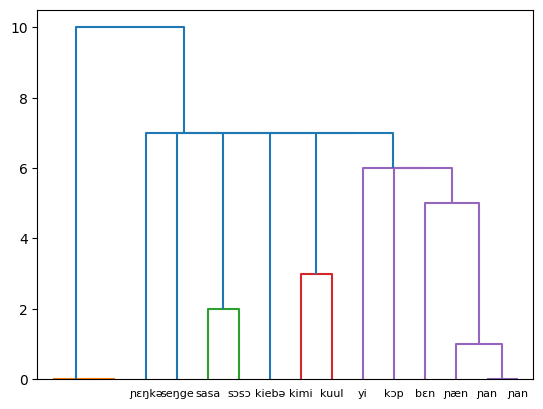

In [365]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

editdist = StringEdit(5, 5, feature_matrix)

def d2(coord):
    i, j = coord
    return editdist(test[i], test[j])

coords = np.triu_indices(len(test), 1)
result = np.apply_along_axis(d2, 0, coords)
clust = linkage(result)

dend = dendrogram(clust, labels=[''.join(i) for i in test], leaf_font_size=8)
plt.show()

In [366]:
'''
class DO:
    
    def __init__(self, a, b, sub):
        self.a = a
        self.b = b
        self.sub = sub
        self.X = []
        self.Y = []
        
        A = []
        B = [] 
         
    def subst(self, X: Set, Y: Set):
        if(X.intersection(Y)):
            return 0
        else:
            return self.sub

    def diag(self, X: Set, Y: Set) -> float:
        if(indel in X and indel in Y):
            return 0
        else:
            return np.inf

    def go(self, A: List, i: int) -> float:
        if((i == 0 or (i > 0 and indel not in A[i - 1])) and indel in A[i]):
            return 0
        else:
            return self.a

    def goPrime(self, X: Set, Y: Set) -> float:
        if(indel not in X):
            return self.subst(X, Y)
        else:
            return self.subst(X, Y) + self.a

    def ge(self, X: Set) -> float:
        if(indel in X):
            return 0
        else:
            return self.b

    def g(self, i, j):
        if(i < 0 and j < 0):
            return 0
        elif(i < 0 or j < 0):
            return np.inf
        else:
            return min(self.g(i - 1, j - 1) + self.subst(self.A[i], self.B[j]),
                       self.d(i - 1, j - 1) + self.subst(self.A[i], self.B[j]) + self.go(self.A, i) + self.go(self.B, j),
                       self.v(i - 1, j - 1) + self.goPrime(self.B[j], self.A[i]),
                       self.h(i - 1, j - 1) + self.goPrime(self.A[i], self.B[j]))

    def h(self, i, j):
        if(i < 0 and j < 0):
            return self.go(self.B, 0)
        elif(i < 0):
            return self.h(-1, j - 1) + self.ge(self.B[j])
        elif(j < 0):
            return np.inf
        else:
            return min(self.h(i, j - 1) + self.ge(self.B[j]), self.d(i, j - 1) + self.ge(self.B[j]) + self.go(self.B, j))

    def v(self, i, j):
        if(i < 0 and j < 0):
            return self.go(self.A, 0)
        elif(i < 0):
            return np.inf
        elif(j < 0):
            return self.v(i - 1, -1) + self.ge(self.A[i])
        else:
            return min(self.v(i - 1, j) + self.ge(self.A[i]), self.d(i - 1, j) + self.ge(self.A[i]) + self.go(self.A, i))

    def d(self, i, j):
        if(i < 0 or j < 0):
            return np.inf
        else:
            return diag(self.A[i], self.B[j]) + min(self.d(i - 1, j - 1), self.g(i - 1, j - 1) + 
                                                    self.go(self.A, i) + self.go(self.B, j))

    def eaffp(self, nA: List, nB: List) -> float:
        self.A = nA
        self.B = nB
        self.X = [set() for i in range(0, len(nA))]
        self.Y = [set() for i in range(0, len(nB))]
        i = len(nA) - 1
        j = len(nB) - 1
        return min(self.g(i, j), self.h(i, j), self.v(i, j), self.d(i, j))

    def maffp(self, nA: List, nB: List) -> List:
        M = []
       # for k in range(0, max(len(A), len(B))):
            #if(X[k] == indel and Y[k])
    

def reverseLevelOrder(root):
    levels = [[] for i in range(0, root.height + 1)]
    queue = deque()
    queue.append((root, 0))

    while queue:
        n = queue.popleft()
 
        if(not levels[root.height - n[1]]):
            levels[root.height - n[1]] = [n[0]]
        else:
            levels[root.height - n[1]].append(n[0])
        
        if n[0].right or n[0].left:
            queue.append((n[0].right, n[1] + 1))
            queue.append((n[0].left, n[1] + 1))
    
    return levels

def string_to_RAG(s: str) -> List[Set]:
    return [set(c) for c in s]

def affine_DO(T: Node):
    for level in reverseLevelOrder(T):
        for node in level:
            if(node.right and node.left):
                print()

def wagner(languages: List[str]):
    T = Node("")
    L = [Node(l) for l in languages]
    for i in range(len(L)):
        c = np.inf
        print(i)
'''